# Imports

In [4]:
import datetime as dt
import pandas as pd # pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import casadi as ca #CasADi is an open-source software tool for numerical optimization in general and optimal control
from pathlib import Path #offers classes representing filesystem paths with semantics appropriate for different operating systems

In [67]:
plt.rc('axes', linewidth=2)
plt.rc('axes', labelsize= 16)
plt.rc('axes',titlesize = 18)
plt.rc('legend',fontsize=14)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('figure',figsize=(10,8))


def figure_layout(figsize=(10,8),titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16, dpi=100):
    plt.figure(figsize=figsize, dpi=dpi)
    ax1 = plt.gca()
    plt.rc('legend',fontsize=fontsize_legend)
    plt.title(titel, fontsize=fontsize_titel, fontweight = 'bold')
    plt.grid(True)
    plt.xlabel(xlabel, fontsize=fontsize_axis)
    plt.ylabel(ylabel, fontsize=fontsize_axis)
    for tick in ax1.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize_ticks)
    #         tick.label1.set_fontweight('bold')
    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize_ticks)
    #     tick.label1.set_fontweight('bold')

    return ax1

# Paths

In [61]:
Lola = True
if Lola == True:
    raw_data_path = Path('/Users/lolabotman/PycharmProjects/Stijn_Staring /TS_code/Data/consumption.csv')
    temp_path = Path('/Users/lolabotman/PycharmProjects/Stijn_Staring /TS_code/Data/weather-avg.csv')
    preprocessed_data = Path('/Users/lolabotman/PycharmProjects/Stijn_Staring /TS_code/Data/FullYear.csv')
else:
    raw_data_path = Path('D:\Onedrive\Leuven\Final project\data\consumption.csv')
    temp_path = Path('D:\Onedrive\Leuven\Final project\data\weather-avg.csv')
    preprocessed_data = Path('D:\Onedrive\Leuven\Final project\data\Forecasting_writtendata\FullYear.csv')
    

# Load Data

In [16]:
#importing the data and getting the all the meters with full data
consumptionLoad = pd.read_csv(raw_data_path,index_col = "meter_id")
consumptionLoad

2017-01-01 00:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.011   
0xfdaf9f857621ec06f2cf801f42a020a322835090                0.015   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.222   
0x47218b46abb2fcaade487a211911406dc6e13730                0.195   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                0.023   

                                            2017-01-01 00:30:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                1.089   
0xfdaf9f857621ec06f2cf801f42a020a322835090                1.523   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.276   
0x47218b46abb2fcaade487a211911406dc6e13730                2.881   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                2.307   

                                            2017-01-01 01:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.014   
0xfdaf9f857621ec06f2cf801f42a020a322835090                0.105   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.097   
0x47218b46abb2fcaade487a211911406dc6e13730                1.765   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                1.403   

                                            2017-01-01 01:30:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.204   
0xfdaf9f857621ec06f2cf801f42a020a322835090                0.296   
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.058   
0x47218b46abb2fcaade487a211911406dc6e13730                1.391   
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                1.471   

                                            2017-01-01 02:00:00  \
meter_id                                                          
0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                                         ...   
0x7dd7a7b8ee1bec7c44

In [17]:
consumptionLoad = consumptionLoad.transpose()
consumptionLoad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17520 entries, 2017-01-01 00:00:00 to 2017-12-31 23:30:00
Columns: 3248 entries, 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7 to 0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd
dtypes: float64(3248)
memory usage: 434.8+ MB


In [18]:
consumptionLoad.index = pd.to_datetime(consumptionLoad.index)
consumptionLoad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-01-01 00:00:00 to 2017-12-31 23:30:00
Columns: 3248 entries, 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7 to 0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd
dtypes: float64(3248)
memory usage: 434.3 MB


In [19]:
# Getting the time-series with full year data

data_monthly = consumptionLoad.resample('MS',axis=0).sum()
new_index_months = data_monthly.index.month_name()
data_monthly.set_index(new_index_months,inplace=True)

### Create an empty dataframe to store the first index of non zero value
first_non_zero_ind = pd.DataFrame(index = ['first_non_zero_row'])

### Create empty list to store IDs of TS to remove (because they are full of zeros/NaN only)
ID_NaN = []

### Loop through the columns and though the indexes of the dataframe
for col_ind in range(len(data_monthly.columns)):
    ID = data_monthly.columns[col_ind]
    for row_ind in range(len(data_monthly.index)):
        
        ### we check for non zero values, but only if a first value has not been selected yet
        if (data_monthly.iloc[[row_ind],[col_ind]].values != 0) and (not ID in first_non_zero_ind.columns):
            first_non_zero_ind.insert(col_ind,ID,[row_ind]) #The value inserted indicates when the data starts
            
        ### in the case of an 'empty' TS, we place a NaN and we save the ID of this TS
        elif ( all(val == 0 for val in data_monthly[[ID]].values) ) and (not ID in first_non_zero_ind.columns):
            first_non_zero_ind.insert(col_ind,ID,np.NaN)
            ID_NaN.append(ID)

print("Meter without data: {}.".format(ID_NaN))

meters_with_full_data = first_non_zero_ind.columns[first_non_zero_ind.iloc[0] == 0]
fullYeardata = consumptionLoad[meters_with_full_data]

# save file to csv to save time on the next run
fullYeardata.to_csv(preprocessed_data)
fullYeardata

Meter without data: ['0x81fa8eddb2b09393d3719984ca5520cb50f45efd'].


meter_id             0x096fa3d4f7a692bca65dfae1a7fcc01089685b58  \
2017-01-01 00:00:00                                       0.175   
2017-01-01 00:30:00                                       0.217   
2017-01-01 01:00:00                                       0.175   
2017-01-01 01:30:00                                       0.206   
2017-01-01 02:00:00                                       0.187   
...                                                         ...   
2017-12-31 21:30:00                                       0.518   
2017-12-31 22:00:00                                       0.188   
2017-12-31 22:30:00                                       0.118   
2017-12-31 23:00:00                                       0.128   
2017-12-31 23:30:00                                       0.112   

meter_id             0x0d65536896a29a82ce55a81d592c3a9c6c0f797b  \
2017-01-01 00:00:00                                       0.280   
2017-01-01 00:30:00                                       1.844   
2017-01-01 01:00:00                                       1.849   
2017-01-01 01:30:00                                       0.577   
2017-01-01 02:00:00                                       0.371   
...                                                         ...   
2017-12-31 21:30:00                                       0.297   
2017-12-31 22:00:00                                       0.233   
2017-12-31 22:30:00                                       0.195   
2017-12-31 23:00:00                                       0.224   
2017-12-31 23:30:00                                       0.242   

meter_id             0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80  \
2017-01-01 00:00:00                                       0.523   
2017-01-01 00:30:00                                       2.285   
2017-01-01 01:00:00                                       1.880   
2017-01-01 01:30:00                                       2.223   
2017-01-01 02:00:00                                       1.020   
...                                                         ...   
2017-12-31 21:30:00                                       0.033   
2017-12-31 22:00:00                                       0.235   
2017-12-31 22:30:00                                       0.288   
2017-12-31 23:00:00                                       0.253   
2017-12-31 23:30:00                                       0.291   

meter_id             0x62e55dbe3cdd3cac46d61144544f6c488041de48  \
2017-01-01 00:00:00                                       0.034   
2017-01-01 00:30:00                                       0.032   
2017-01-01 01:00:00                                       0.045   
2017-01-01 01:30:00                                       0.333   
2017-01-01 02:00:00                                       1.638   
...                                                         ...   
2017-12-31 21:30:00                                       0.064   
2017-12-31 22:00:00                                       0.078   
2017-12-31 22:30:00                                       0.095   
2017-12-31 23:00:00                                       0.073   
2017-12-31 23:30:00                                       0.097   

meter_id             0x88fc9ea558b9a98e3fc91ec0044b3c83ac630790  \
2017-01-01 00:00:00                                       0.185   
2017-01-01 00:30:00                                       0.205   
2017-01-01 01:00:00                                       0.176   
2017-01-01 01:30:00                                       0.159   
2017-01-01 02:00:00                                       0.585   
...                                                         ...   
2017-12-31 21:30:00                                       0.088   
2017-12-31 22:00:00                                       0.056   
2017-12-31 22:30:00                                       0.013   
2017-12-31 23:00:00                                       0.013   
2017-12-31 23:30:00                        

In [44]:
#tip on print statement 
var1 = 42 
var2='test'
var3 = [1,2,3]
print(f'This is a print statement with 3 variables : var1 = {var1}, var2 = {var2} and var3 = {var3}')

This is a print statement with 3 variables : var1 = 42, var2 = test and var3 = [1, 2, 3]


In [20]:
fullYeardata = fullYeardata.fillna(value = 10**5)
fullYeardata.isnull().sum(axis=0)

meter_id
0x096fa3d4f7a692bca65dfae1a7fcc01089685b58    0
0x0d65536896a29a82ce55a81d592c3a9c6c0f797b    0
0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80    0
0x62e55dbe3cdd3cac46d61144544f6c488041de48    0
0x88fc9ea558b9a98e3fc91ec0044b3c83ac630790    0
                                             ..
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    0
0xfdaf9f857621ec06f2cf801f42a020a322835090    0
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    0
0x47218b46abb2fcaade487a211911406dc6e13730    0
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd    0
Length: 270, dtype: int64

In [35]:
# # Dealing with missing values --> avoiding the introduction of the estimation error by dropping the missing days.

In [21]:
# removing the time-series with zero daily consumption
fydc_new_daily = fullYeardata.resample('D',axis=0).sum()
amountZeroDays = dict()

for col in fydc_new_daily.columns:
    count = 0
    for row in fydc_new_daily.index:
        value = fydc_new_daily.loc[row,col]
        if value == 0:
            count = count + 1
    amountZeroDays[col] = count


In [22]:
originalLength = fullYeardata.shape[1]
for key in amountZeroDays:
    if amountZeroDays[key] > 0:
        fullYeardata.drop(key,axis=1,inplace=True)
        print("Meter that is dropped: %s."% key)
newLength = fullYeardata.shape[1]
print("Amount of meters original: %s.\nAfter removal: %s."%(originalLength,newLength))

Meter that is dropped: 0x527e622c3c78de734e795e39eee8620fc0ab55ea.
Meter that is dropped: 0xe23ac37ef224dfdbb8161cf80f190357f7ce8669.
Meter that is dropped: 0x5d6c9072779ee576e516752d9e190c84669ea01e.
Meter that is dropped: 0x6e7987cc630ae6a908a9a87d8543c0397951f01f.
Meter that is dropped: 0x730c76974a3b171805e1fd9cc73e45365e95badb.
Meter that is dropped: 0x46e32d2640f77904c6cb31229e62e78cf62f121f.
Meter that is dropped: 0xa915749f3e6902d809a148ee17934c3c2c21888d.
Meter that is dropped: 0x61c5f4683169ab47eac0bbd439919f2d8ec68dd8.
Meter that is dropped: 0x317e1b6bca135656cf58c38e8984b857a772cfb5.
Amount of meters original: 270.
After removal: 261.


In [26]:
fullYeardata = fullYeardata.replace(to_replace=10**5,value=np.nan)
fullYeardata.to_csv(preprocessed_data)
fullYeardata

meter_id             0x096fa3d4f7a692bca65dfae1a7fcc01089685b58  \
2017-01-01 00:00:00                                       0.175   
2017-01-01 00:30:00                                       0.217   
2017-01-01 01:00:00                                       0.175   
2017-01-01 01:30:00                                       0.206   
2017-01-01 02:00:00                                       0.187   
...                                                         ...   
2017-12-31 21:30:00                                       0.518   
2017-12-31 22:00:00                                       0.188   
2017-12-31 22:30:00                                       0.118   
2017-12-31 23:00:00                                       0.128   
2017-12-31 23:30:00                                       0.112   

meter_id             0x0d65536896a29a82ce55a81d592c3a9c6c0f797b  \
2017-01-01 00:00:00                                       0.280   
2017-01-01 00:30:00                                       1.844   
2017-01-01 01:00:00                                       1.849   
2017-01-01 01:30:00                                       0.577   
2017-01-01 02:00:00                                       0.371   
...                                                         ...   
2017-12-31 21:30:00                                       0.297   
2017-12-31 22:00:00                                       0.233   
2017-12-31 22:30:00                                       0.195   
2017-12-31 23:00:00                                       0.224   
2017-12-31 23:30:00                                       0.242   

meter_id             0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80  \
2017-01-01 00:00:00                                       0.523   
2017-01-01 00:30:00                                       2.285   
2017-01-01 01:00:00                                       1.880   
2017-01-01 01:30:00                                       2.223   
2017-01-01 02:00:00                                       1.020   
...                                                         ...   
2017-12-31 21:30:00                                       0.033   
2017-12-31 22:00:00                                       0.235   
2017-12-31 22:30:00                                       0.288   
2017-12-31 23:00:00                                       0.253   
2017-12-31 23:30:00                                       0.291   

meter_id             0x62e55dbe3cdd3cac46d61144544f6c488041de48  \
2017-01-01 00:00:00                                       0.034   
2017-01-01 00:30:00                                       0.032   
2017-01-01 01:00:00                                       0.045   
2017-01-01 01:30:00                                       0.333   
2017-01-01 02:00:00                                       1.638   
...                                                         ...   
2017-12-31 21:30:00                                       0.064   
2017-12-31 22:00:00                                       0.078   
2017-12-31 22:30:00                                       0.095   
2017-12-31 23:00:00                                       0.073   
2017-12-31 23:30:00                                       0.097   

meter_id             0x88fc9ea558b9a98e3fc91ec0044b3c83ac630790  \
2017-01-01 00:00:00                                       0.185   
2017-01-01 00:30:00                                       0.205   
2017-01-01 01:00:00                                       0.176   
2017-01-01 01:30:00                                       0.159   
2017-01-01 02:00:00                                       0.585   
...                                                         ...   
2017-12-31 21:30:00                                       0.088   
2017-12-31 22:00:00                                       0.056   
2017-12-31 22:30:00                                       0.013   
2017-12-31 23:00:00                                       0.013   
2017-12-31 23:30:00                        

In [27]:
# Still containing nan values
#fullYeardata = pd.read_csv(preprocessed_data,index_col= "date",parse_dates= True)

### Baseline model: same forecast as same day previous week
All the baseline models:
1. find most similar consumption in trainingset based on id house, which day, which time, which temperature ok
2. previous day ok
3. previous week ok
4. Mean forecast based on time of day and type of day
5. Empirical mape minimization

In [28]:
# drop all the nan values that are in the time-serie
name = fullYeardata.columns[0]
TS = fullYeardata[name]
TS_december = TS[TS.index.month == 12]

In [43]:
#tip Lola :use .loc and .iloc e.g. :

fullYeardata.iloc[:,0]

2017-01-01 00:00:00    0.175
2017-01-01 00:30:00    0.217
2017-01-01 01:00:00    0.175
2017-01-01 01:30:00    0.206
2017-01-01 02:00:00    0.187
                       ...  
2017-12-31 21:30:00    0.518
2017-12-31 22:00:00    0.188
2017-12-31 22:30:00    0.118
2017-12-31 23:00:00    0.128
2017-12-31 23:30:00    0.112
Name: 0x096fa3d4f7a692bca65dfae1a7fcc01089685b58, Length: 17520, dtype: float64

previous day and week

In [45]:
# The model will not always produce an output --> can be that the previous day is not known
def base_model_week_before(test_dates: pd.DatetimeIndex,serie: pd.Series,amount_days:int = 7):
    base_forecast = pd.Series(index= test_dates,name= 'base_forecast: ' + str(amount_days) + ' days')
    for d in test_dates:
        get_date = d + dt.timedelta(days=-amount_days)
        forecast = serie.loc[get_date]
        base_forecast[d] = forecast

    return base_forecast

/Users/lolabotman/opt/anaconda3/envs/TestKerasInstall/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


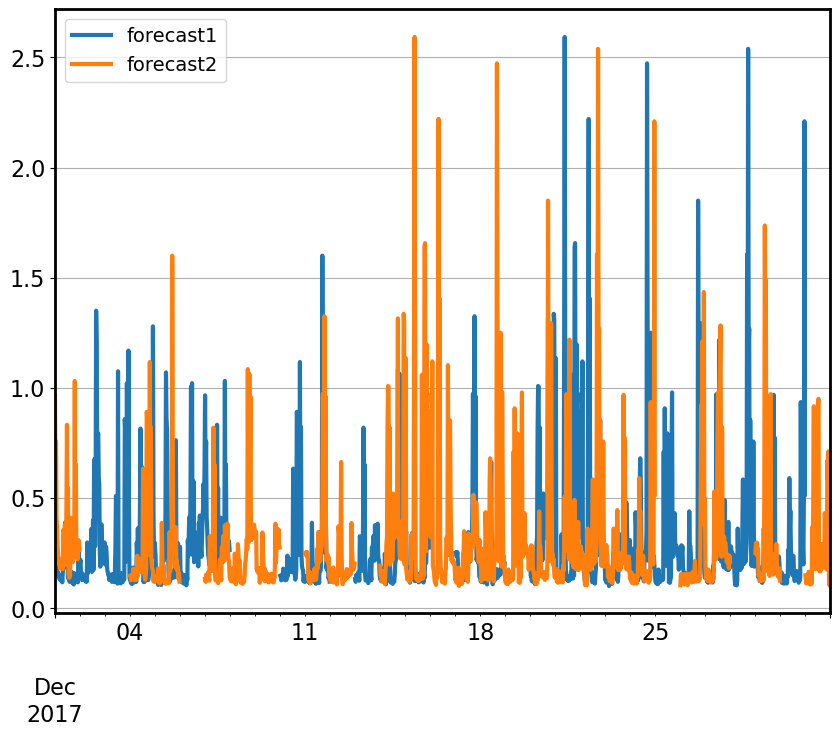

In [68]:
forecast1 = base_model_week_before(TS_december.index,TS)
forecast2 = base_model_week_before(TS_december.index,TS,amount_days=1)
ax1 = figure_layout(figsize=(10,8),titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16)
forecast1.plot(ax=ax1,grid=True,lw=3.0,label = 'forecast1')
forecast2.plot(ax=ax1,grid=True,lw=3.0,label = 'forecast2')
plt.legend()
plt.show()

In [59]:
test_TS = TS_december

In [62]:
av_temperature = pd.read_csv(temp_path,index_col='meter_id')
av_temperature = av_temperature.transpose()
av_temperature.index = pd.to_datetime(av_temperature.index)
av_temperature.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Columns: 3248 entries, 0xa62b9f23553ff183f61e2bf943aab3d5983d02d7 to 0x7b5ab0d98465e18c8efc1969685e814293352a1b
dtypes: float64(3248)
memory usage: 9.0 MB


In [63]:
av_temperature

meter_id    0xa62b9f23553ff183f61e2bf943aab3d5983d02d7  \
2017-01-01                                    4.904167   
2017-01-02                                    1.275000   
2017-01-03                                    2.225000   
2017-01-04                                    4.266667   
2017-01-05                                    0.262500   
...                                                ...   
2017-12-27                                    1.491667   
2017-12-28                                    0.562500   
2017-12-29                                    2.925000   
2017-12-30                                    9.383333   
2017-12-31                                    9.462500   

meter_id    0xc53b26e7f9cc49e8131409db6e3bc47a2b7cee20  \
2017-01-01                                    4.904167   
2017-01-02                                    1.275000   
2017-01-03                                    2.225000   
2017-01-04                                    4.266667   
2017-01-05                                    0.262500   
...                                                ...   
2017-12-27                                    1.491667   
2017-12-28                                    0.562500   
2017-12-29                                    2.925000   
2017-12-30                                    9.383333   
2017-12-31                                    9.462500   

meter_id    0x99c6ba65bec5c1e83f8c19f6518178c87732c406  \
2017-01-01                                    5.391667   
2017-01-02                                    1.550000   
2017-01-03                                    2.883333   
2017-01-04                                    4.691667   
2017-01-05                                    0.729167   
...                                                ...   
2017-12-27                                    2.225000   
2017-12-28                                    1.262500   
2017-12-29                                    3.308333   
2017-12-30                                    9.304167   
2017-12-31                                    9.708333   

meter_id    0x8f04b8efaa48f13810f51e4b361961226d718ef1  \
2017-01-01                                    5.250000   
2017-01-02                                    1.237500   
2017-01-03                                    2.287500   
2017-01-04                                    4.612500   
2017-01-05                                    0.954167   
...                                                ...   
2017-12-27                                    2.529167   
2017-12-28                                    0.337500   
2017-12-29                                    2.225000   
2017-12-30                                    8.462500   
2017-12-31                                    9.404167   

meter_id    0x1a586297008785374c9de5073e7781d14d105bc8  \
2017-01-01                                    5.370833   
2017-01-02                                    1.529167   
2017-01-03                                    3.045833   
2017-01-04                                    4.341667   
2017-01-05                                    0.670833   
...                                                ...   
2017-12-27                                    2.370833   
2017-12-28                                    1.187500   
2017-12-29                                    1.908333   
2017-12-30                                    7.775000   
2017-12-31                                    9.270833   

meter_id    0x95dc7b9ffafcc7ea0035c9371eb45d9b43033f79  \
2017-01-01                                    5.370833   
2017-01-02                                    1.529167   
2017-01-03                                    3.045833   
2017-01-04                                    4.341667   
2017-01-05                                    0.670833   
...                                                ...   
2017-12-27                                    2.370833   
2017-12-28                                    1.187

In [64]:
TS_av_temperature = av_temperature[name]

In [65]:
# importing the holidays
from pandas.tseries.holiday import (
    AbstractHolidayCalendar, DateOffset, EasterMonday,
    GoodFriday, Holiday, MO,
    next_monday, next_monday_or_tuesday)
class EnglandAndWalesHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Years Day', month=1, day=1, observance=next_monday),
        GoodFriday,
        EasterMonday,
        Holiday('Early May bank holiday',
                month=5, day=1, offset=DateOffset(weekday=MO(1))),
        Holiday('Spring bank holiday',
                month=5, day=31, offset=DateOffset(weekday=MO(-1))),
        Holiday('Summer bank holiday',
                month=8, day=31, offset=DateOffset(weekday=MO(-1))),
        Holiday('Christmas Day', month=12, day=25, observance=next_monday),
        Holiday('Boxing Day',
                month=12, day=26, observance=next_monday_or_tuesday)
    ]

find the corresponding weekday based on kind of day and temperature

In [66]:
# normalization is not really necessary
def norm(serie: pd.Series):
    values = serie.values
    l = len(values)
    values = values.reshape((l, 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)
    norm_serie = scaler.transform(values)
    norm_serie = norm_serie.squeeze()
    norm_serie = pd.Series(data=norm_serie,index=serie.index)
    return norm_serie

def get_closest_day(training_days: pd.DatetimeIndex,temperature: pd.Series,daily_temp:float):
    day = abs(temperature[training_days] - daily_temp).idxmin()
    return day

def find_most_similar_day(test_dates: pd.DatetimeIndex,serie: pd.Series,temperature: pd.Series):
    # The assumption is made that the test_dates are one continuous sequence of days
    daily_test_dates = pd.date_range(start=test_dates[0],end=test_dates[-1],freq='D')
    base_forecast = pd.Series(index= test_dates,name= 'closest_day_forecast')
    temperature = norm(temperature)

    for day in daily_test_dates:
        training_days = pd.date_range(start=pd.Timestamp('2017-01-01'),end=day + dt.timedelta(-1),freq='D')
        holidays = EnglandAndWalesHolidayCalendar().holidays(start=pd.Timestamp('2017-01-01'),end=day + dt.timedelta(-1))
        training_days = training_days.symmetric_difference(holidays)
        day_temp = temperature[temperature.index.dayofyear == day.dayofyear][0]

        if day in holidays:
            # look for holiday and Sunday (to get more days) --> we know that similarity is highest with Sunday
            sundays = training_days[training_days.weekday == 6]
            training_days = sundays.union(holidays)
            cl_day = get_closest_day(training_days,temperature,day_temp)
            forecast = serie[serie.index.dayofyear == cl_day.dayofyear].values
            base_forecast[base_forecast.index.dayofyear == day.dayofyear] = forecast

        else:
            training_days = training_days[training_days.weekday == day.weekday()]
            cl_day = get_closest_day(training_days,temperature,day_temp)
            forecast = serie[serie.index.dayofyear == cl_day.dayofyear].values
            base_forecast[base_forecast.index.dayofyear == day.dayofyear] = forecast

    return base_forecast


In [67]:
# forecast3 = find_most_similar_day(test_TS.index,TS,TS_av_temperature)
# ax1 = figure_layout(figsize=(10,8),titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16)
# forecast3.plot(ax=ax1,grid=True,lw=3.0)
# plt.show()

# If want to include all the different time-series in a dataframe
# df = pd.DataFrame(index=TS_december.index)
# df = df.join(forecast1)
# df = df.join(forecast2)

mean forecast, based on time of day and day type (holiday and which day of the week)

In [68]:
def mean_forecast(test_dates: pd.DatetimeIndex,serie: pd.Series):
    # The assumption is made that the test_dates are one continuous sequence of days
    daily_test_dates = pd.date_range(start=test_dates[0],end=test_dates[-1],freq='D')
    base_forecast = pd.Series(index= test_dates,name= "mean_forecast")

    for day in daily_test_dates:
        training_days = pd.date_range(start=pd.Timestamp('2017-01-01'),end=day + dt.timedelta(-1),freq='D')
        holidays = EnglandAndWalesHolidayCalendar().holidays(start=pd.Timestamp('2017-01-01'),end=day + dt.timedelta(-1))
        training_days = training_days.symmetric_difference(holidays)
        df = pd.DataFrame()

        if day in holidays:
            #mean holiday
            for holiday in holidays:
                selected_day = serie[serie.index.dayofyear == holiday.dayofyear].values
                df[str(holiday)] = selected_day
            df_mean = df.mean(axis=1).values.squeeze()
            base_forecast[base_forecast.index.dayofyear == day.dayofyear] = df_mean

        else:
            #mean weekday
            training_days = training_days[training_days.weekday == day.weekday()]
            for training_day in training_days:
                selected_day = serie[serie.index.dayofyear == training_day.dayofyear].values
                df[str(training_day)] = selected_day
            df_mean = df.mean(axis=1).values.squeeze()
            base_forecast[base_forecast.index.dayofyear == day.dayofyear] = df_mean

    return base_forecast

In [69]:
# forecast4 = mean_forecast(test_TS.index,TS)
# ax1 = figure_layout(figsize=(10,8),titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16)
# forecast4.plot(ax=ax1,grid=True,lw=3.0)
# plt.show()

Empirical MAPE minimization
To calculate the amount of bins the ‘fd’ (Freedman Diaconis Estimator) is used.

In [70]:
# making histogram
def histogram(training_serie: pd.Series):
    loads = training_serie.values
    # ax = figure_layout(figsize=(10,8),titel="Discretized distribution",xlabel="Load [kWh]",ylabel="Probability [-]")
    # ax.grid(axis='y', alpha=0.75)
    # ax.grid(axis='x', alpha=0.75)
    # plt.clf()
    loads = loads[~np.isnan(loads)]
    n, bins = np.histogram(a=loads, bins='fd',density=False)

    return n,bins


In [71]:
# need to select the time of the day and day type
def MAPE_estimator(test_dates: pd.DatetimeIndex,serie: pd.Series):
    # The assumption is made that the test_dates are one continuous sequence of days
    daily_test_dates = pd.date_range(start=test_dates[0],end=test_dates[-1],freq='D')
    base_forecast = pd.Series(index= test_dates,name= 'MAPE_forecast')

    for day in daily_test_dates:
        training_days = pd.date_range(start=pd.Timestamp('2017-01-01'),end=day + dt.timedelta(-1),freq='D')
        holidays = EnglandAndWalesHolidayCalendar().holidays(start=pd.Timestamp('2017-01-01'),end=day + dt.timedelta(-1))
        training_days = training_days.symmetric_difference(holidays)

        if day in holidays:
            sundays = training_days[training_days.weekday == 6]
            training_days = sundays.union(holidays)
            forecast = MAPE_optimization(training_days,serie) # numpy array
            base_forecast[base_forecast.index.dayofyear == day.dayofyear] = forecast

        else:
            training_days = training_days[training_days.weekday == day.weekday()]
            forecast = MAPE_optimization(training_days,serie) # numpy array
            base_forecast[base_forecast.index.dayofyear == day.dayofyear] = forecast

    return base_forecast

In [72]:
def MAPE_optimization(training_days:pd.DatetimeIndex,serie:pd.Series,time_steps:int=48):
    stock = np.zeros(time_steps)
    training_hours = pd.date_range(start='00:00:00',periods=time_steps,freq='30min')
    training_30min = pd.date_range(start=training_days[0],periods=time_steps,freq='30min')
    for training_day in training_days[1:]:
        new_day = pd.date_range(start=training_day,periods=time_steps,freq='30min')
        training_30min = training_30min.union(new_day)

    # Select the hours for which an individual forecast should be made
    for index in np.arange(0,time_steps):
        temp = training_30min[training_30min.hour == training_hours[index].hour]
        data = temp[temp.minute == training_hours[index].minute]
        n,bins = histogram(serie[data])
        probability = n/sum(n)
        discretized_values = []
        for j in np.arange(0,len(bins)-1):
            if probability[j] != 0:
                discretized_values.append((bins[j] + bins[j+1])/2)
        # remove zero probabilities
        probability = probability[probability != 0]
        discretized_values = np.array(discretized_values)

        if len(probability) != len(discretized_values) or np.around(sum(probability),2) != 1:
            print(sum(probability))
            raise Exception("The lenghts are not equal or prob is not one.")

        # solve the optimization problem
        opti = ca.Opti()
        p = opti.variable()
        obj = 0
        for j in np.arange(0,len(discretized_values)):
            pi = discretized_values[j]
            obj = obj + probability[j]*((p-pi)/pi)**2
        opti.minimize(obj)
        opti.subject_to(p>=0)
        opti.set_initial(p,0.3)
        opti.solver('ipopt')
        sol = opti.solve()
        print(100*"#")
        stock[index] = sol.value(p)

    return stock


In [73]:
# run MAPE
forecast5 = MAPE_estimator(test_TS.index,TS)

C:\Users\Stijn\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        1
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

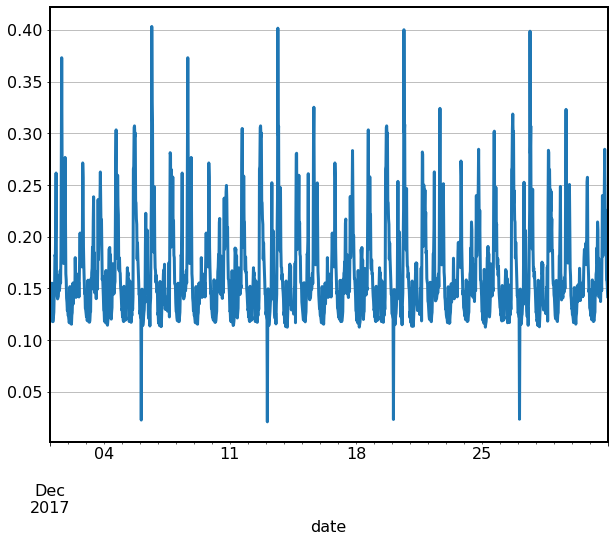

In [74]:
ax1 = figure_layout(figsize=(10,8),titel="",xlabel="",ylabel="",fontsize_titel=18,fontsize_axis=16,fontsize_legend=14,fontsize_ticks=16)
forecast5.plot(ax=ax1,grid=True,lw=3.0)
plt.show()

In [75]:
# Evaluation metrics
def RMSE(forecast: pd.Series,real: pd.Series):
    return np.sqrt(sum((forecast.values - real.values)**2)/len(forecast.values))

def MSE(forecast: pd.Series,real: pd.Series):
    return sum((forecast.values - real.values)**2)/len(forecast.values)

def NRMSE(forecast: pd.Series,real: pd.Series):
    ymax = real.max()
    ymin = real.min()
    RMSE = np.sqrt(sum((forecast.values - real.values)**2)/len(forecast.values))
    return RMSE/(ymax-ymin)

def MAE(forecast: pd.Series,real: pd.Series):
    return sum(abs(forecast.values - real.values))/len(forecast.values)

def MAPE(forecast: pd.Series,real: pd.Series):
    return sum(abs((forecast.values - real.values)/real.values))/len(forecast.values)

In [ ]:
# get the time-series without zero consumptions
fval = fullYeardata.values
collection = []
for i in np.arange(0,fval.shape[0]):
    for j in np.arange(0,fval.shape[1]):
        if fval[i,j] == 0:
            # print("i: %s, j: %s, value: %s"%(i,j,fval[i,j]))
            collection.append(j)

In [ ]:
collection_set = set(collection)